Gradients and Behavior Components Analysis Plots.

In [ ]:
import numpy as np
import pandas as pd
from Packages.CCA.utils import *
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Loading in X and Y data
Xpc = np.load('/data/NIMH_scratch/zwallymi/gradients/regressed_spearman_correlations.npy')
Ypc = np.load('/data/NIMH_scratch/zwallymi/behavioral/regressed_behavioral_pca.npy')
U = np.load('/data/NIMH_scratch/zwallymi/gradients_and_behavior/10kperm/10kperm_U.npy')
V = np.load('/data/NIMH_scratch/zwallymi/gradients_and_behavior/10kperm/10kperm_V.npy')
y_data = pd.DataFrame(np.load('/data/NIMH_scratch/zwallymi/behavioral/site_regressed_scores.npy'), 
                    columns=['SM 1','SM 2','SM 3','SM 4','SM 5','SM 6','SM 7','SM 8','SM 9',
                            'SM 10','SM 11','SM 12','SM 13','SM 14','SM 15','SM 16', 'SM 17', 
                            'SM 18', 'SM 19', 'SM 20', 'SM 21', 'SM 22', 'SM 23', 'SM 24', 'SM 25',])
x_data = pd.DataFrame(Xpc[:,:10], columns=['Grad 1', 'Grad 2', 'Grad 3', 'Grad 4', 'Grad 5', 'Grad 6', 
                                        'Grad 7', 'Grad 8', 'Grad 9', 'Grad 10'])

#gradient variance plot weights
x_sub_weights =pd.DataFrame(U[:,:2])
x_data = pd.DataFrame(Xpc[:,:10])
x_merged = pd.concat([x_sub_weights, x_data], axis=1)
x_corrs = x_merged.corr(method='pearson')

#variance of gradients, determines marker size in plots
U1 = U[:,0:1]
U2 = U[:,1:2]
N = Xpc
grad_variance1 = []
grad_variance2 = []
for i in range(10) :
    var1 = np.var(U1@(np.linalg.pinv([U1])@N[:,i:i+1]))/np.var(N[:,i:i+1])
    grad_variance1.append(var1)
    var2 = np.var(U2@(np.linalg.pinv([U2])@N[:,i:i+1]))/np.var(N[:,i:i+1])
    grad_variance2.append(var2)

#positive-negative axis weights
y_sub_weights = pd.DataFrame(V[:,:2])
y_data = pd.DataFrame(np.load('/data/NIMH_scratch/zwallymi/behavioral/site_regressed_scores.npy'))
y_merged = pd.concat([y_sub_weights, y_data], axis=1)
y_corrs = y_merged.corr(method='pearson')

raw_factor = pd.read_csv('/data/NIMH_scratch/zwallymi/behavioral/filtered_scores.csv')
raw_factor = raw_factor.columns[2:]
y_indices = pd.Index(['CCA1', 'CCA2'])
y_indices = y_indices.append(raw_factor)

#variance of SMs, determines text size in pos-neg axis
V1 = V[:,0:1]    
V2 = V[:,0:1]
S = np.load('/data/NIMH_scratch/zwallymi/behavioral/site_regressed_scores.npy')
beh_variance1 = []
beh_variance2 = []
for i in range(25) :
    var1 = np.var(V1@(np.linalg.pinv([V1])@S[:,i:i+1]))/np.var(S[:,i:i+1])
    var2 = np.var(V2@(np.linalg.pinv([V2])@S[:,i:i+1]))/np.var(S[:,i:i+1])
    beh_variance1.append(var1)
    beh_variance2.append(var2)

keys_renamed = ["Picture Vocabulary Task", "Flanker Test", "List Sorting Task", "Card Sorting Task", "Pattern Comparison Task", "Picture Sequence Task", "Oral Reading Task", 
                "Little Man Test", "Auditory Verbal Learning", "Wechsler Intelligence Scale", "Anxiety Disorder", "Depressive Disorder",  "ADHD", 
                "Conduct Disorder", "Oppositional Disorder", "Somatic Disorder", "Attention Problems", "Somatic Symptoms",  "Thought Problems",
                "Withdrawal Depression", "Aggressive Behavior", "Rulebreaking",  "Anxiety Depression Symptoms", "Social Problems", "Prosocial Behavior"]


Gradient lollipop plots for Modes 1 and 2

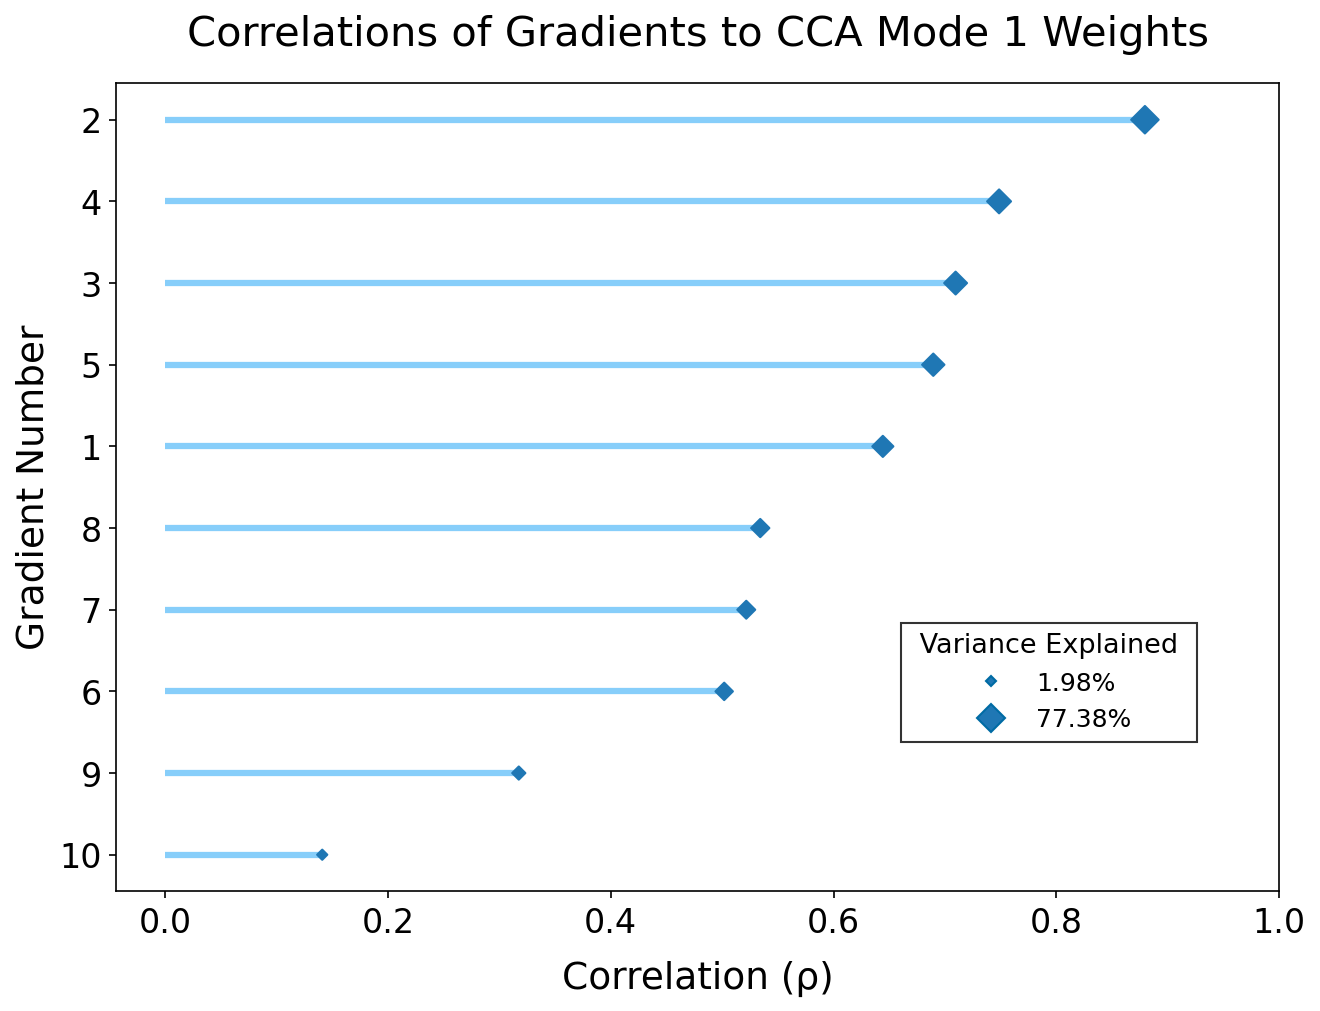

In [6]:
#set marker sizes
odf1 = pd.DataFrame({'variances': grad_variance1, 'order': [6, 10, 8, 9, 7, 3, 4, 5, 2, 1]})
mdf1 = odf1.sort_values(by='order')
mdf1 = mdf1.reset_index(drop=True)
marker_size1 = mdf1['variances']*100 + 10

plt.figure(figsize=(10, 7), dpi=150)

plt.style.use('tableau-colorblind10')
labels1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
values1 = np.array(x_corrs.iloc[2:,0])
df = pd.DataFrame({'group':labels1, 'values':values1})
# Reorder based on the values:
ordered_df = df.sort_values(by='values')
ordered_df = ordered_df.reset_index(drop=True)
ordered_df['values'] = ordered_df['values']
my_range=range(1,len(df.index)+1)

#create horizontal lines and markers
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='lightskyblue', linewidths=3, zorder=0)
scatter = plt.scatter(ordered_df['values'], my_range, s=marker_size1, marker="D", color='tab:blue')

#set ticks and labels
plt.yticks(my_range, ordered_df['group'], size=16) # type: ignore
plt.xticks(size=16)
plt.title("Correlations of Gradients to CCA Mode 1 Weights", size=20, pad=18)
plt.xlabel('Correlation (⍴)', size=18, labelpad=10)
plt.xlim(right=1)
plt.ylabel('Gradient Number',size=18)

#make legend
legend_elements = [Line2D([0], [0], marker="D", label='1.98%', linewidth=0, markerfacecolor='tab:blue', markersize=np.sqrt(marker_size1[0])),
                Line2D([0], [0], marker="D", label='77.38%', linewidth=0, markerfacecolor='tab:blue', markersize=np.sqrt(marker_size1[9]))]
plt.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.94, 0.17), title=' Variance Explained ', 
        edgecolor='black', fancybox=False, prop={'size': 12}, title_fontsize=13)

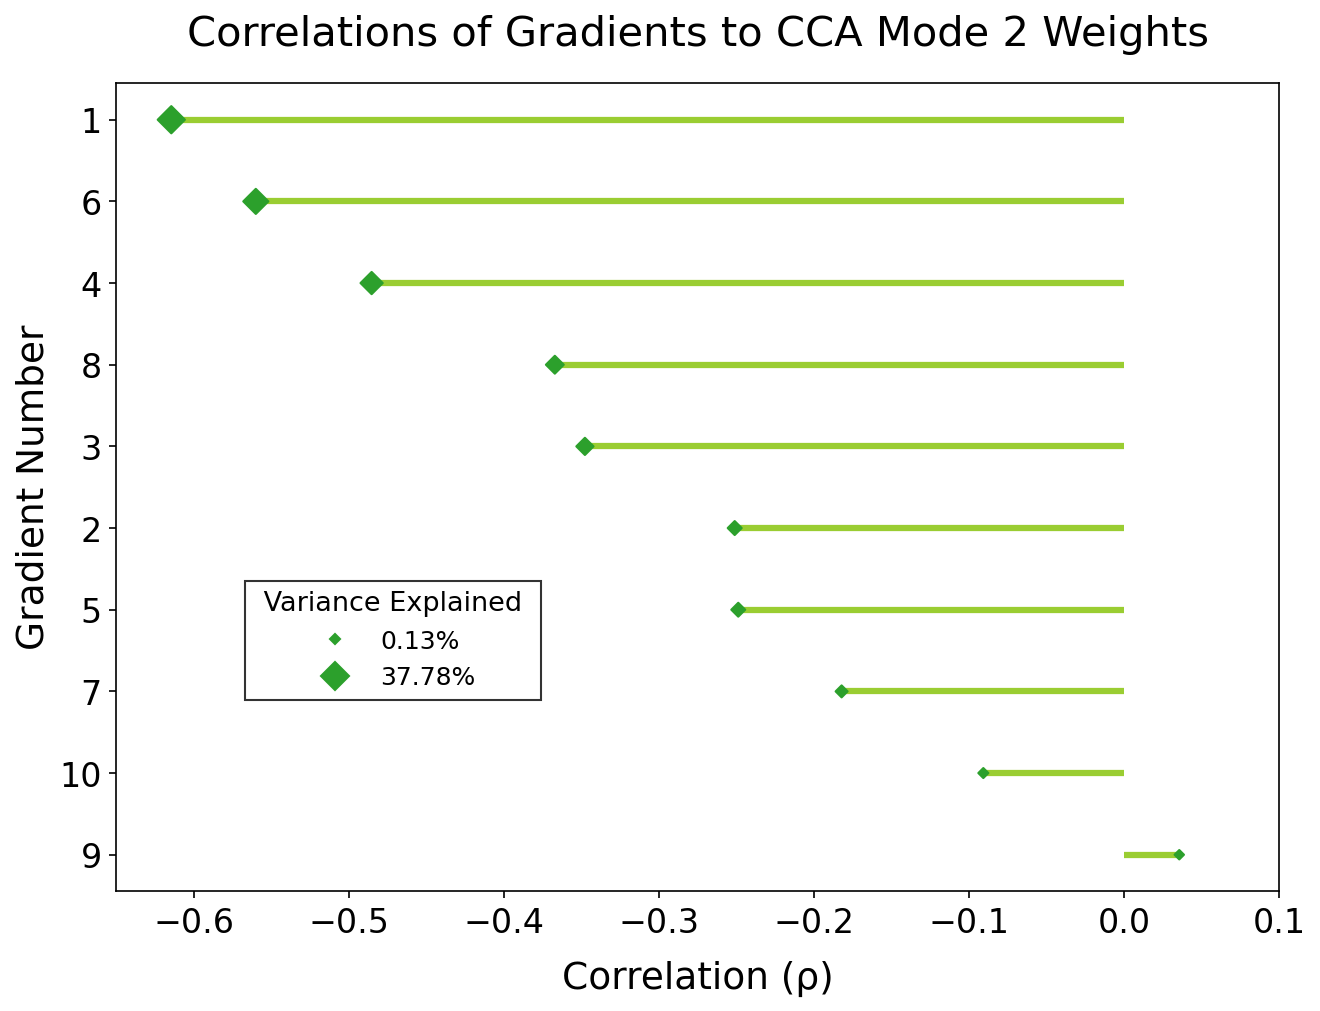

In [7]:
#set marker sizes
odf2 = pd.DataFrame({'variances': grad_variance2, 'order': [10, 5, 6, 8, 4, 9, 3, 7, 1, 2]})
mdf2 = odf2.sort_values(by='order')
mdf2 = mdf2.reset_index(drop=True)
marker_size2 = mdf2['variances']*200 + 10

plt.figure(figsize=(10, 7), dpi=150)

plt.style.use('tableau-colorblind10')
values2 = np.array(x_corrs.iloc[2:,1])
df = pd.DataFrame({'group': labels1, 'values': values2})
# Reorder it based on the values:
ordered_df = df.sort_values(by='values', ascending=False)
ordered_df = ordered_df.reset_index(drop=True)
ordered_df['values'] = ordered_df['values']
my_range=range(1,len(df.index)+1)

#create horizontal lines and markers
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='yellowgreen', linewidths=3, zorder=0)
scatter = plt.scatter(ordered_df['values'], my_range, s=marker_size2, marker="D", color='tab:green')

#set ticks and labels
plt.yticks(my_range, ordered_df['group'], size=16) #type: ignore
plt.xticks([-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1], size=16)
plt.title("Correlations of Gradients to CCA Mode 2 Weights", size=20, pad=18)
plt.xlabel('Correlation (⍴)', size=18, labelpad=10)
plt.ylabel('Gradient Number',size=18)
plt.xlabel('Correlation (⍴)')
plt.xlim(left=-0.65)

#make legend
legend_elements = [Line2D([0], [0], marker="D", label='0.13%', linewidth=0, markeredgecolor='tab:green', markerfacecolor='tab:green', markersize=np.sqrt(marker_size2[0])),
                Line2D([0], [0], marker="D", label='37.78%', linewidth=0, markeredgecolor='tab:green', markerfacecolor='tab:green', markersize=np.sqrt(marker_size2[9]))]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.1, 0.4), title=' Variance Explained ', 
        edgecolor='black', fancybox=False, prop={'size': 12}, title_fontsize=13)

Positive-Negative Axis for Modes 1 and 2

Note: This code does not generate a complete positive-negative axis plot; axis and legend are not included. Use the values created in the first block to add axis and legend in an editor of your choosing (I used Google Drawings)

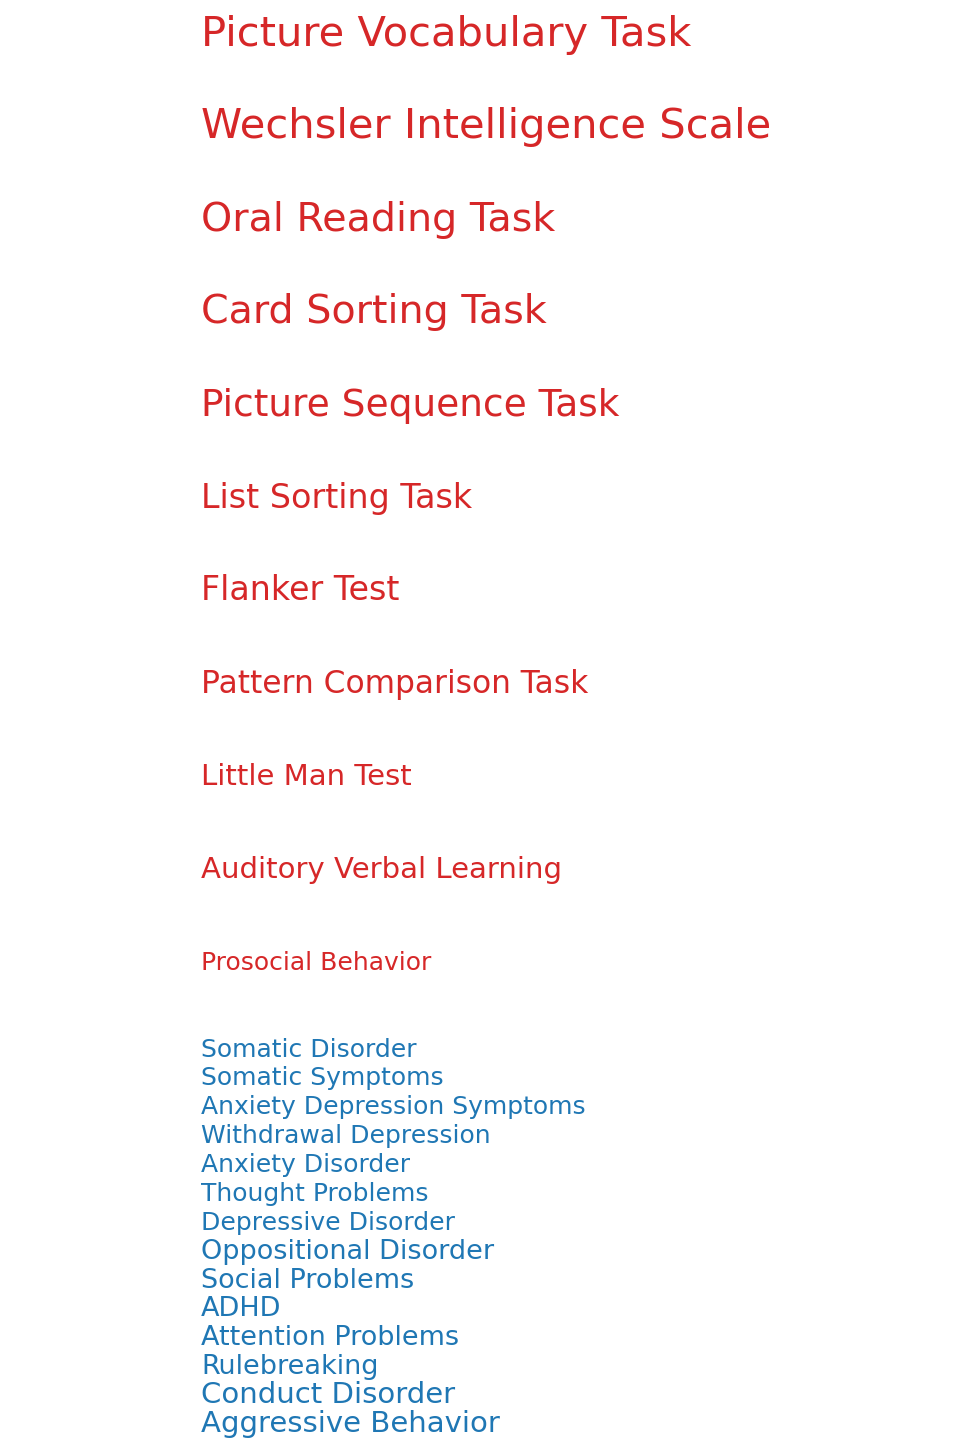

In [ ]:
#rearrange subject measure names into variance order
y_corrs1 = np.array(y_corrs)[2:,:1]
pos_neg1 = {}
for i in range(25) :
    pos_neg1[keys_renamed[i]] = y_corrs1.item(i)
    
pos_neg_df1 = pd.DataFrame([y_indices[2:], pos_neg1.keys(), pos_neg1.values(), beh_variance1], index=['old', 'measure', 'correlation', 'variance'])
pos_neg_df1 = pos_neg_df1.T

sorted_pos_neg1 = pos_neg_df1.sort_values(by='correlation', ascending=False)
keys1 = sorted_pos_neg1['measure']
keys1 = keys1.reset_index(drop=True)
values1 = sorted_pos_neg1['correlation']
values1 = values1.reset_index(drop=True)
vars1 = sorted_pos_neg1['variance']
vars1 = vars1.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
plt.axis("off")

#set location and color for each subject measure name
for i in range(0,25) :
    if values1[i] > 0:
        if vars1[i] > 0.4 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=20)
        elif vars1[i] > 0.35 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=19)
        elif vars1[i] > 0.3 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=18)
        elif vars1[i] > 0.5 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=17)
        elif vars1[i] > 0.2 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=16)
        elif vars1[i] > 0.15 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=15)
        elif vars1[i] > 0.1 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=14)
        elif vars1[i] > 0.05 :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=13)
        else :
            text = ax.text(.2, 1.75-(i/5), keys1[i], color="tab:red", size=12)
    else :
        if vars1[i] > 0.4 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=20)
        elif vars1[i] > 0.35 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=19)
        elif vars1[i] > 0.3 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=18)
        elif vars1[i] > 0.5 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=17)
        elif vars1[i] > 0.2 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=16)
        elif vars1[i] > 0.15 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=15)
        elif vars1[i] > 0.1 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=14)
        elif vars1[i] > 0.05 :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=13)
        else :
            text = ax.text(.2, 0.25-(i/16), keys1[i], color="tab:blue", size=12)

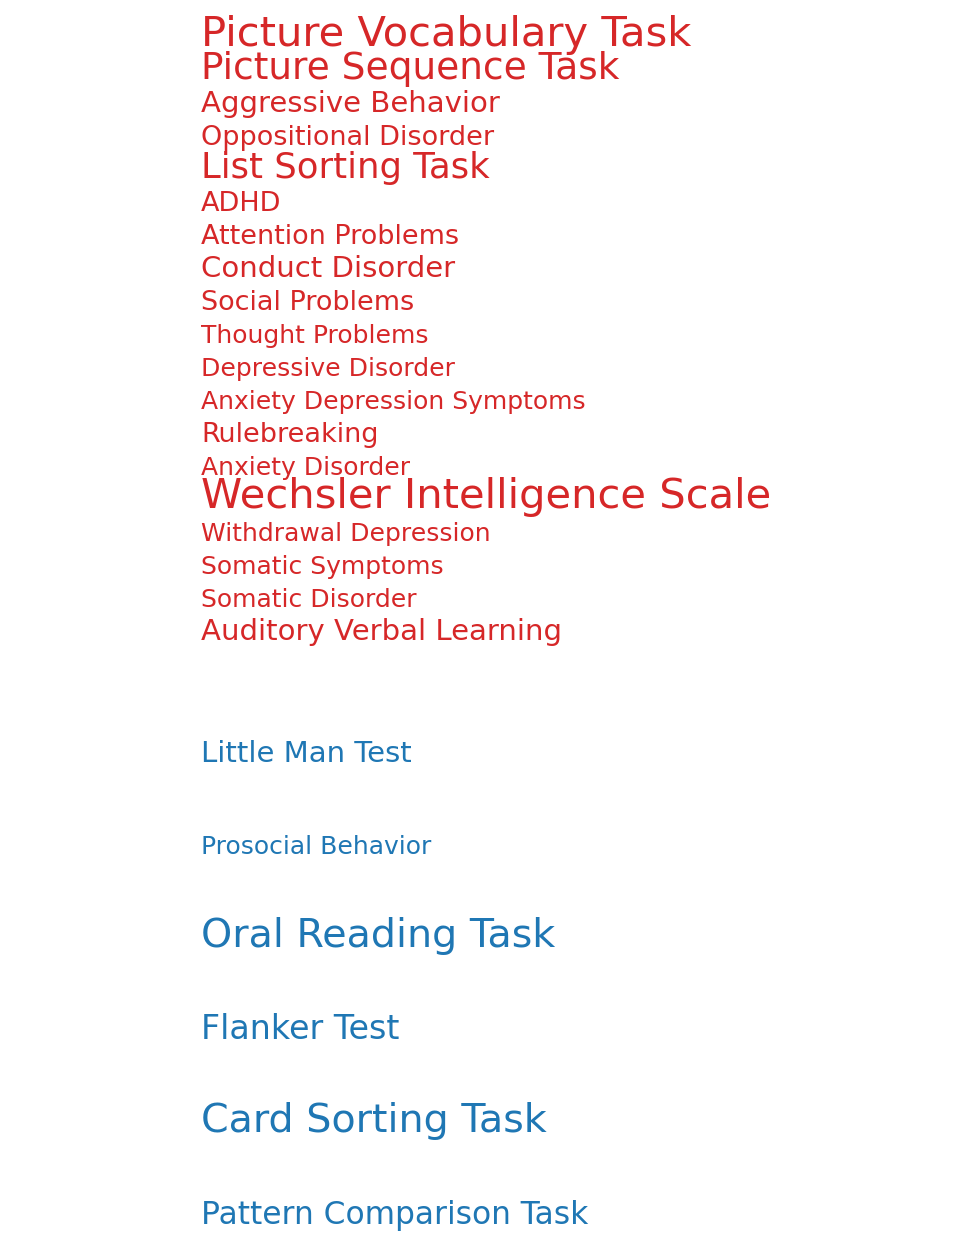

In [ ]:
#rearrange subject measure names into variance order      
y_corrs2 = np.array(y_corrs)[2:,1:2]
pos_neg2 = {}
for i in range(25) :
    pos_neg2[keys_renamed[i]] = y_corrs2.item(i)
    
pos_neg_df2 = pd.DataFrame([y_indices[2:], pos_neg2.keys(), pos_neg2.values(), beh_variance2], index=['old', 'measure', 'correlation', 'variance'])
pos_neg_df2 = pos_neg_df2.T

sorted_pos_neg2 = pos_neg_df2.sort_values(by='correlation', ascending=False)
keys2 = sorted_pos_neg2['measure']
keys2 = keys2.reset_index(drop=True)
values2 = sorted_pos_neg2['correlation']
values2 = values2.reset_index(drop=True)
vars2 = sorted_pos_neg2['variance']
vars2 = vars2.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
plt.axis("off")

#set location and color for each subject measure name
for i in range(0,25) :
    if values2[i] > 0:
        if vars2[i] > 0.4 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=20)
        elif vars2[i] > 0.35 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=19)
        elif vars2[i] > 0.3 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=18)
        elif vars2[i] > 0.25 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=17)
        elif vars2[i] > 0.2 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=16)
        elif vars2[i] > 0.15 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=15)
        elif vars2[i] > 0.1 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=14)
        elif vars2[i] > 0.05 :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=13)
        else :
            text = ax.text(.2, 1-(i/14), keys2[i], color="tab:red", size=12)
    else :
        if vars2[i] > 0.4 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=20)
        elif vars2[i] > 0.35 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=19)
        elif vars2[i] > 0.3 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=18)
        elif vars2[i] > 0.25 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=17)
        elif vars2[i] > 0.2 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=16)
        elif vars2[i] > 0.15 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=15)
        elif vars2[i] > 0.1 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=14)
        elif vars2[i] > 0.05 :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=13)
        else :
            text = ax.text(.2, 3.25-(i/5), keys2[i], color="tab:blue", size=12)